# Unsupervised Learning Mod 26.10
## Dimensionality Reduction and Clustering

### Spend some time on Kaggle and pick a dataset

I found a cost of living dataset on Kaggle that I believe will work well for this purpose as there are usually large gaps between different costs of living (ex: Very high cost of living, high cost of living, medium cost of living, and low cost of living)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import metrics
import umap
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV file obtained from Kaggle
# col = cost of living
col = pd.read_csv('cost-of-living.csv')

In [3]:
# Quick view of the data
col.head()

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.0,3.38,3.58,5.27,...,3.75,5.72,3.82,15.0,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.0,17.48,22.99,23.73,...,18.76,22.01,11.47,60.0,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.0,4.51,3.58,4.22,...,3.56,3.67,3.06,8.2,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.0,1.69,1.02,0.84,...,1.50,1.10,2.37,4.0,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.0,2.82,1.53,2.11,...,1.50,2.20,3.06,4.0,7.26,5.57,5.59,4.97,2.81,2.70


In [4]:
col

,Unnamed: 0,"Saint Petersburg, Russia","Istanbul, Turkey","Izmir, Turkey","Helsinki, Finland","Chisinau, Moldova","Milan, Italy","Cairo, Egypt","Banja Luka, Bosnia And Herzegovina","Baku, Azerbaijan",...,"Lviv, Ukraine","Novosibirsk, Russia","Bursa, Turkey","Brussels, Belgium","Jerusalem, Israel","Melbourne, Australia","Perth, Australia","Sydney, Australia","Alexandria, Egypt","Quito, Ecuador"
0,"Meal, Inexpensive Restaurant",7.34,4.58,3.06,12.00,4.67,15.00,3.38,3.58,5.27,...,3.75,5.72,3.82,15.00,15.56,10.22,12.43,11.81,2.81,3.59
1,"Meal for 2 People, Mid-range Restaurant, Three...",29.35,15.28,12.22,65.00,20.74,60.00,17.48,22.99,23.73,...,18.76,22.01,11.47,60.00,62.24,49.54,56.55,54.37,14.06,31.45
2,McMeal at McDonalds (or Equivalent Combo Meal),4.40,3.82,3.06,8.00,4.15,8.00,4.51,3.58,4.22,...,3.56,3.67,3.06,8.20,12.97,7.12,7.32,7.15,3.38,5.39
3,Domestic Beer (0.5 liter draught),2.20,3.06,2.29,6.50,1.04,5.00,1.69,1.02,0.84,...,1.50,1.10,2.37,4.00,7.26,5.57,5.90,4.97,1.69,1.35
4,Imported Beer (0.33 liter bottle),2.20,3.06,2.75,6.75,1.43,5.00,2.82,1.53,2.11,...,1.50,2.20,3.06,4.00,7.26,5.57,5.59,4.97,2.81,2.70
5,Coke/Pepsi (0.33 liter bottle),0.76,0.64,0.61,2.66,0.64,2.49,0.29,1.18,0.37,...,0.48,0.69,0.70,2.47,2.07,1.91,1.79,1.99,0.32,0.71
6,Water (0.33 liter bottle),0.53,0.24,0.22,1.89,0.44,1.12,0.18,0.74,0.21,...,0.37,0.52,0.23,2.07,1.71,1.70,1.62,1.68,0.19,0.47
7,"Milk (regular), (1 liter)",0.98,0.71,0.65,0.96,0.68,1.21,0.84,0.69,0.83,...,0.85,0.85,0.69,0.97,1.43,0.90,1.03,0.90,0.81,0.87
8,Loaf of Fresh White Bread (500g),0.71,0.36,0.38,2.27,0.33,1.94,0.51,0.63,0.26,...,0.46,0.49,0.42,1.64,1.54,1.88,1.76,1.85,0.51,1.35
9,Eggs (regular) (12),1.18,1.62,1.51,2.02,1.11,2.87,1.04,1.47,1.03,...,1.21,1.00,1.63,2.65,3.32,2.85,2.59,2.79,1.02,1.59


In [5]:
# Because of the way the data is arranged we are going to flip the rows and columns
# This way we'll be looking at the features by column
col = col.transpose()

In [6]:
col

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three...",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red M...,Toyota Corolla 1.6l 97kW Comfort (Or Equivalen...,"Preschool (or Kindergarten), Full Day, Private...","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.7,0.9,1.88,2.85,...,1.57,2.63,1.58,3.06,2.2,1.78,9.42,15221.8,1250.41,12874.1
"Perth, Australia",12.43,56.55,7.32,5.9,5.59,1.79,1.62,1.03,1.76,2.59,...,1.26,2.86,1.96,2.4,2.11,1.29,9.49,15239.2,1190.12,11526.1
"Sydney, Australia",11.81,54.37,7.15,4.97,4.97,1.99,1.68,0.9,1.85,2.79,...,1.59,2.48,1.65,3.01,2.17,1.72,11.24,15066.6,1389.43,11933.5
"Alexandria, Egypt",2.81,14.06,3.38,1.69,2.81,0.32,0.19,0.81,0.51,1.02,...,0.2,1.45,0.66,0.39,0.66,0.31,8.37,23071.9,55.41,2132.54


In [7]:
col.columns = col.iloc[0]
col = col.drop(col.index[0])

In [8]:
col

Unnamed: 0,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),...,Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.4,2.2,2.2,0.76,0.53,0.98,0.71,1.18,...,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.3,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,...,0.61,1.84,1.3,0.8,1.91,0.62,9.73,20874.7,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,...,0.57,1.56,1.31,0.7,1.78,0.58,8.61,20898.8,212.18,4948.41
"Helsinki, Finland",12,65,8,6.5,6.75,2.66,1.89,0.96,2.27,2.02,...,2.3,3.87,2.13,2.91,1.61,1.25,12.34,24402.8,351.6,1641
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,...,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.1,210.52,2679.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.7,0.9,1.88,2.85,...,1.57,2.63,1.58,3.06,2.2,1.78,9.42,15221.8,1250.41,12874.1
"Perth, Australia",12.43,56.55,7.32,5.9,5.59,1.79,1.62,1.03,1.76,2.59,...,1.26,2.86,1.96,2.4,2.11,1.29,9.49,15239.2,1190.12,11526.1
"Sydney, Australia",11.81,54.37,7.15,4.97,4.97,1.99,1.68,0.9,1.85,2.79,...,1.59,2.48,1.65,3.01,2.17,1.72,11.24,15066.6,1389.43,11933.5
"Alexandria, Egypt",2.81,14.06,3.38,1.69,2.81,0.32,0.19,0.81,0.51,1.02,...,0.2,1.45,0.66,0.39,0.66,0.31,8.37,23071.9,55.41,2132.54


In [9]:
# Check data types
col.dtypes

Unnamed: 0
Meal, Inexpensive Restaurant                                                  object
Meal for 2 People, Mid-range Restaurant, Three-course                         object
McMeal at McDonalds (or Equivalent Combo Meal)                                object
Domestic Beer (0.5 liter draught)                                             object
Imported Beer (0.33 liter bottle)                                             object
Coke/Pepsi (0.33 liter bottle)                                                object
Water (0.33 liter bottle)                                                     object
Milk (regular), (1 liter)                                                     object
Loaf of Fresh White Bread (500g)                                              object
Eggs (regular) (12)                                                           object
Local Cheese (1kg)                                                            object
Water (1.5 liter bottle)                              

In [10]:
# Convert all columns to float
col = col.astype('float')

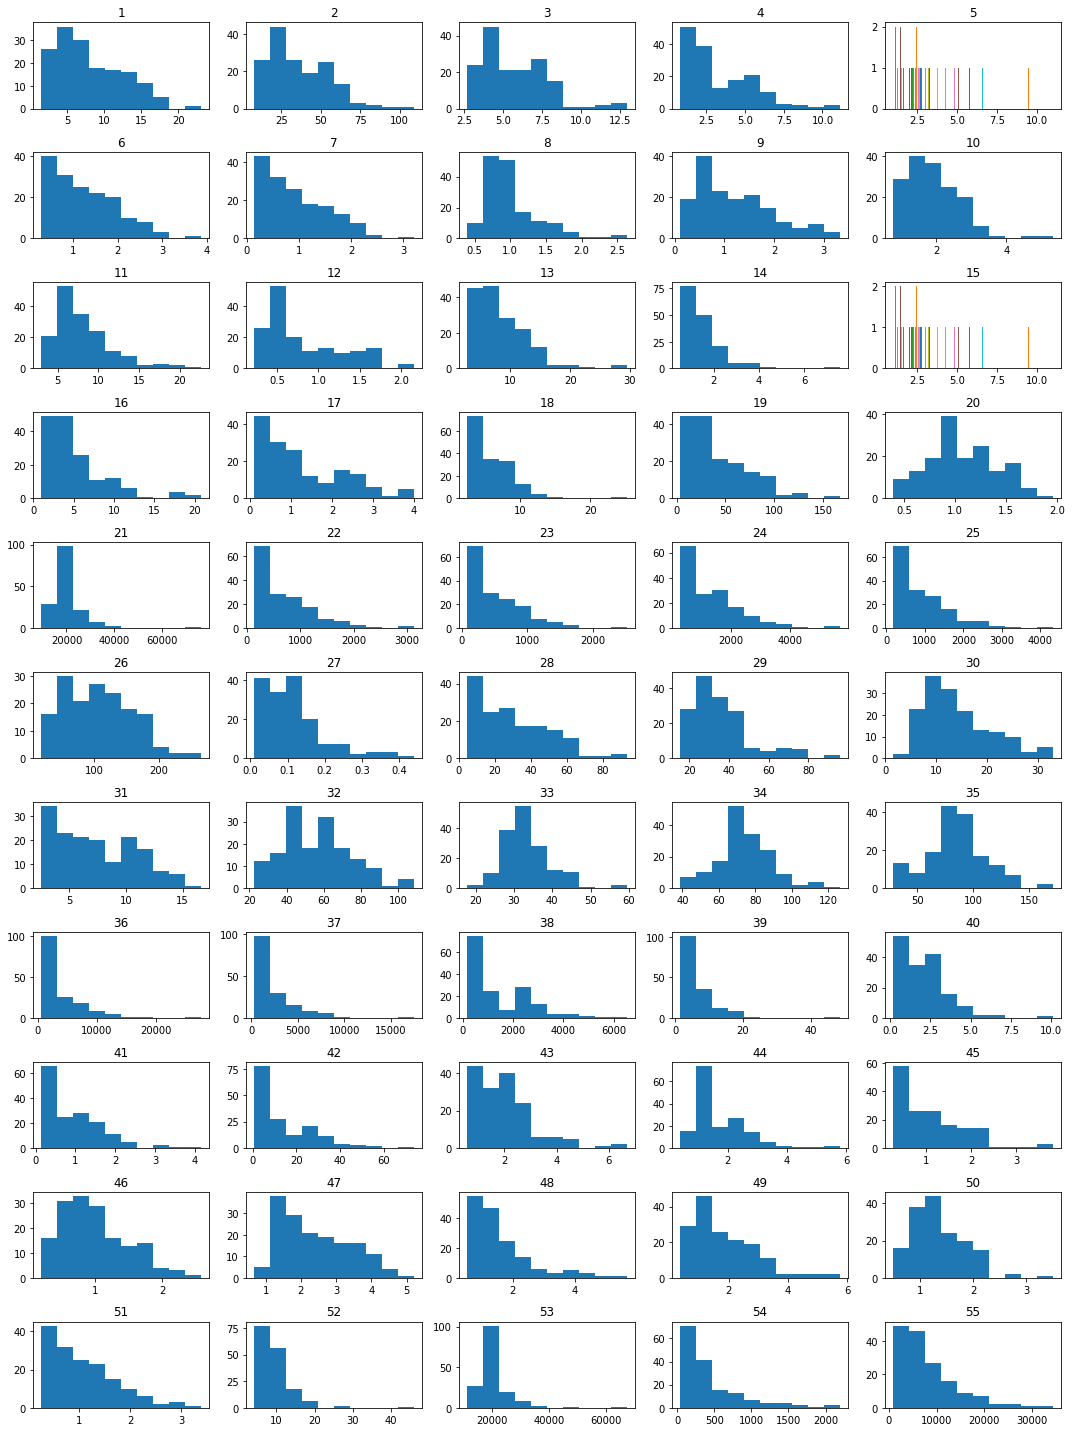

In [11]:
feats = col.columns

fig = plt.figure(figsize=(15,20))

n=0

for x in feats:
    n += 1
    plt.subplot(11 , 5, n)
    plt.hist(col[x])
    plt.title(n)
    
plt.tight_layout()
plt.show()

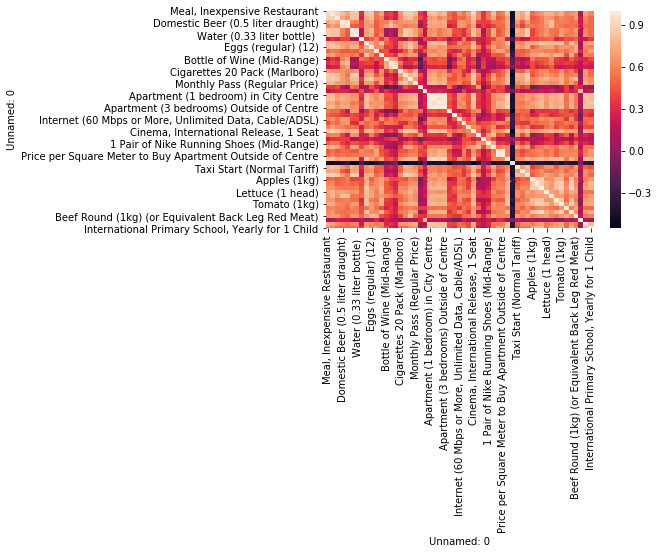

In [12]:
sns.heatmap(col.corr())

In [13]:
X = col

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Apply dimensionality reduction techniques to visualize the observations.

#### PCA

In [14]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

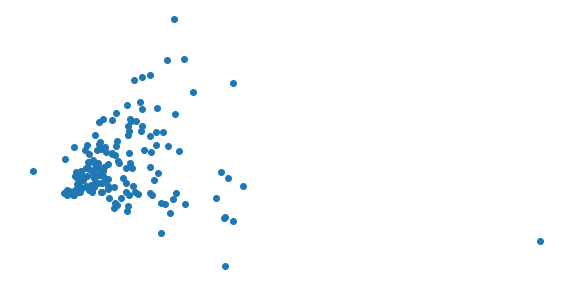

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We can see from the visual a few data points clearly separated from the rest.

#### UMAP

In [16]:
umap_results = umap.UMAP(n_neighbors=25,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

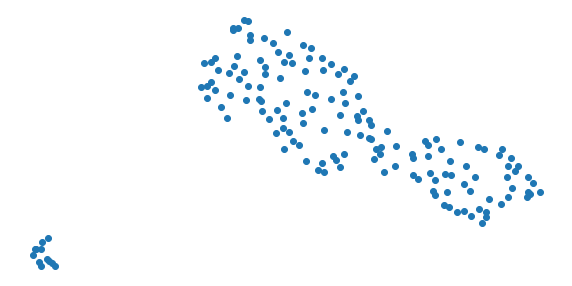

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

For the UMAP algorithm I chose a larger n_neighbors value to get a more gloabl look at the data. We can see again more clearly that there are a few data points far removed from the rest.  Thinking of the data set it's possible that these could be developed vs non-developed countries.

### Apply clustering techniques to group together similar observations.

Looking at the above plots of the dimensionality reductions, let's stick with a clustering of 2 groups and see how the different algorithms perform.

#### K-means

In [18]:
# Define K-means
k_means = KMeans(n_clusters=2, random_state=123)

# Fit and predict model
k_means.fit(X_std)
y_pred = k_means.predict(X_std)

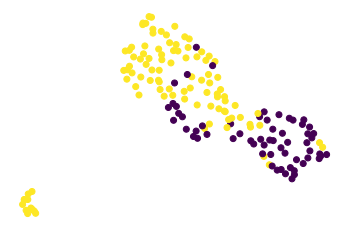

In [19]:
# Visualize using UMap
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_pred)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

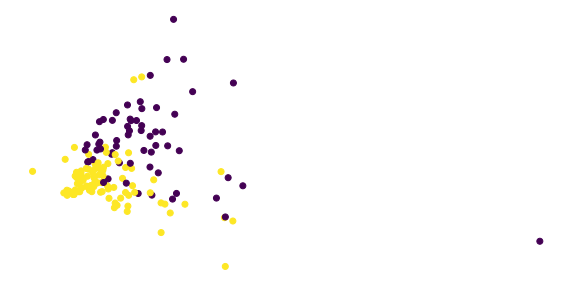

In [20]:
# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=y_pred)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [21]:
print("Silhouette score for K-means model: {}".format(
    metrics.silhouette_score(X_std, y_pred, metric='euclidean')))

Silhouette score for K-means model: 0.4015198051673553


#### Hierarchical Clustering

###### Complete Method

In [22]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete',
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
pred_complete = agg_cluster.fit_predict(X_std)

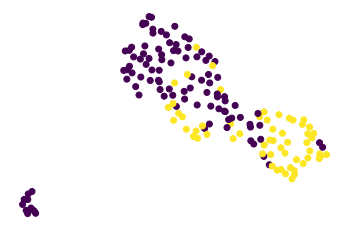

In [23]:
# Visualize using UMap
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=pred_complete)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

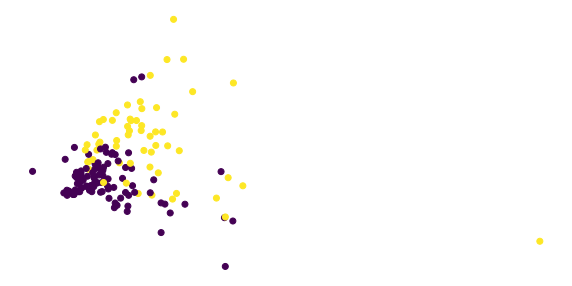

In [24]:
# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=pred_complete)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [25]:
print("Silhouette score for K-means model: {}".format(
    metrics.silhouette_score(X_std, pred_complete, metric='euclidean')))

Silhouette score for K-means model: 0.39013867886670867


###### Average Method

In [26]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average',
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
pred_average = agg_cluster.fit_predict(X_std)

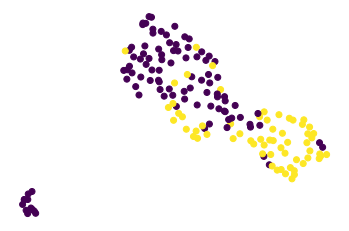

In [27]:
# Visualize using UMap
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=pred_average)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

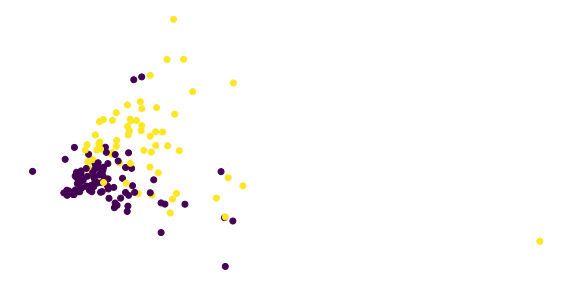

In [28]:
# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=pred_average)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [29]:
print("Silhouette score for K-means model: {}".format(
    metrics.silhouette_score(X_std, pred_average, metric='euclidean')))

Silhouette score for K-means model: 0.39869351190411095


###### Ward Method

In [30]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward',
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
pred_ward = agg_cluster.fit_predict(X_std)

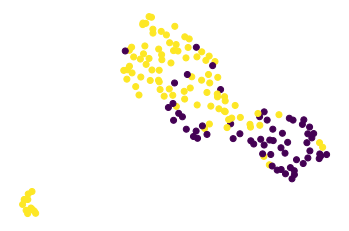

In [31]:
# Visualize using UMap
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=pred_ward)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

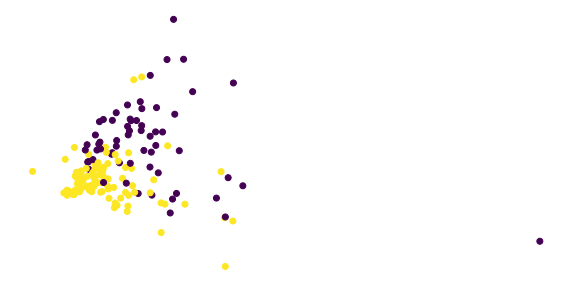

In [32]:
# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=pred_ward)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [33]:
print("Silhouette score for K-means model: {}".format(
    metrics.silhouette_score(X_std, pred_ward, metric='euclidean')))

Silhouette score for K-means model: 0.39768384790266076


#### GMM

In [34]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

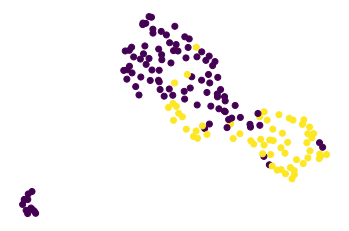

In [35]:
# Visualize using UMap
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=clusters)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

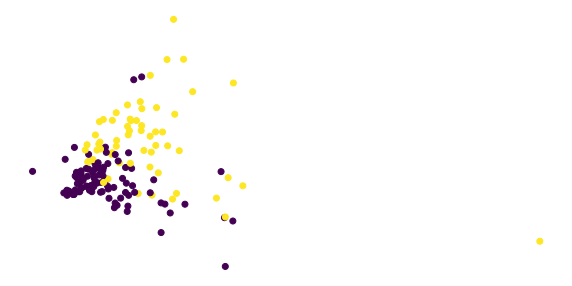

In [36]:
# Visualize using PCA
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [37]:
print("Silhouette score for K-means model: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Silhouette score for K-means model: 0.4028234885826757


## Summary

Based on the silhouette scores above the GMM model was the best performing model on this dataset.  Because we did not have a ground truth for the dataset the silhouette score was the only evaluation used.  We could however create a ground truth based on some criteria to perform an ARI.